# <span style="color:darkblue">Introduction to the project</span>

The purpose of our project was to examine the evidence that a proposed bill being put before the UK Parliament will be effective in reducing smoking rates in the UK.

The long title of this bill is:

> A Bill to Make provision about the supply of tobacco, vapes and other products, including provision prohibiting the sale of tobacco to people born on or after 1 January 2009; and to enable product requirements to be imposed in connection with tobacco, vapes and other products.

https://bills.parliament.uk/bills/3703

The Bill will restrict the sale of cigarettes to people born after 2008.  Each year the age at which people can buy cigarettes will increase, so people born after 31st December 2008 will never be able to buy them.  This will be enforced by fining shops who break the law.  The government believes that this will reduce the harm caused by smoking, which is still the number one cause of preventable deaths in the UK and costs the NHS £17bn a year.


https://www.bbc.co.uk/news/health-68825322#:~:text=The%20restrictions%20will%20apply%20to,able%20to%20legally%20buy%20cigarettes.



**We used evidence to answer two questions:**

**<span style="color:darkblue">Question One:</span>**\
How effective does historic data suggest that government mitigations have been on affecting smoking prevalence and mortality?

**<span style="color:darkblue">Question Two:</span>**\
Based on this analysis, how effective will the new ban be on reducing smoking prevalence and mortality?



## <span style="color:darkblue"> Question One: </span>
### **How effective does historic data suggest that government mitigations have been on affecting smoking prevalence and mortality?**

### Analysis of changes in global smoking rates

Using data from the WHO we have analysed how effective government measures have been on reducing rates of smoking globally, in order to determine how effective government measures are in general at reducing smoking rates.


The WHO adopted the WHO Framework Convention on Tobacco Control on 21 May 2003 as a response to the global tobacco epidemic.  It uses the MPOWER package to help countries reduce their smoking rates by reducing the demand for tobacco products from their populations.  It has six different strands:


- **M**: Monitor tobacco use and prevention policies
- **P**: Protect people from tobacco smoke
- **O**: Offer help to quit tobacco use
- **W**: Warn about the dangers of tobacco
- **E**: Enforce bans on tobacco advertising, promotion and sponsorship
- **R**: Raise taxes on tobacco

https://www.who.int/initiatives/mpower

### Analysis

The WHO categories each of these strands into 5 groups to based on how well they have been implemented in each country, with 1 being the lowest level of control and 5 being the greatest.  This data is publically avaliable via an API.

We used this API to get a total score per country for each year it is available.  This was used to calculate a weighted mean for the world as a whole, based on the population of each country.

By comparing this to global smoking rates, also avaliable via an API, we prepared an analysis to see if there is a relationship between the adoption of these initiatives globally and the global smoking rate.

https://www.who.int/data/gho/data/themes/topics/indicator-groups/indicator-group-details/GHO/tobacco-control---progress-towards-selected-tobacco-control-policies-for-demand-reduction

In [772]:
# Import all libraries needed for the project
import requests as requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import requests as requests
from functools import reduce

In [773]:
# Get all API data needed from the WHO

# Define the urls for each of the APIs needed:
# Global smoking rates by year:
url_sr = "https://ghoapi.azureedge.net/api/M_Est_tob_curr_std?$filter=SpatialDimType%20eq%20%27GLOBAL%27"
# Levels of smoking intervention prevelance:
urlM = "https://ghoapi.azureedge.net/api/M_Group"
urlP = "https://ghoapi.azureedge.net/api/P_Group"
urlO = "https://ghoapi.azureedge.net/api/O_Group"
urlW = "https://ghoapi.azureedge.net/api/W_Group"
urlE = "https://ghoapi.azureedge.net/api/E_Group"
urlR = "https://ghoapi.azureedge.net/api/R_Group"
# World population by country:
urlpop = "https://ghoapi.azureedge.net/api/RS_1845"

#Use request module to get the API data:
response_sr = requests.get(url_sr)
responseM = requests.get(urlM)
responseP = requests.get(urlP)
responseO = requests.get(urlO)
responseW = requests.get(urlW)
responseE = requests.get(urlE)
responseR = requests.get(urlR)
responsepop = requests.get(urlpop)

#Turn response into JSON data, using the response function from the requests module:
json_data_rate = response_sr.json()
json_data_M = responseM.json()
json_data_P = responseP.json()
json_data_O = responseO.json()
json_data_W = responseW.json()
json_data_E = responseE.json()
json_data_R = responseR.json()
json_data_pop = responsepop.json()

#Check that the data has been imported and give an error message if not:
if response_sr.status_code == 200 & responseM.status_code == 200 & responseP.status_code == 200 & responseP.status_code == 200 & responseO.status_code == 200 & responseW.status_code == 200 & responseE.status_code == 200 & responseR.status_code == 200 & responsepop.status_code == 200:
    print("Data was retrieved")
else:
    print("There was an error retrieving the data")

Data was retrieved


In [774]:
# Create a panda's DataFrame for global smoking rates:

# Set empty arrays to append data to:
sr_value = [] # For rates
sr_time = [] # For years

# Loop through API data and append data to the empty arrays
for i in json_data_rate["value"]:
    if i["Dim1"] == "SEX_BTSX":  # Data for both sexes together
        sr_value.append(i["NumericValue"])
        sr_time.append(i['TimeDimensionValue'])

# Create a list of the data and the column labels
data = list(zip(sr_time, sr_value))
label = ["Year", "Smoking Rate"]

#Create the DataFrame
df_rate = pd.DataFrame(data, columns = label)
# Turn the data into numeric values for calculations to be performed and graphs produced
df_rate = df_rate.apply(pd.to_numeric, errors='coerce')
# Set the year as the DataFrame's index
df_rate = df_rate.set_index("Year")
df_rate

,Smoking Rate
Year,
2007,28.1
2000,32.7
2030,18.1
2005,29.3
2021,21.3
2010,26.4
2022,20.9
2018,22.5
2015,23.9


In [775]:
# Create a panda's DataFrame for population data:

# Set empty arrays
indexpop = [] # For the country code
valuepop = [] # For the population

# Loop through API data and append values to the empty arrays
for i in json_data_pop["value"]:
    indexpop.append(i["SpatialDim"])
    valuepop.append(i["Value"])

# Create a list of the data in the arrays and the columns
data = list(zip(indexpop, valuepop))
label = ["Code", "Population"]

# Create the DataFrame
df_pop = pd.DataFrame(data, columns = label)

# Clean the spaces out of the numerical data in order to use it for a calculation
df_pop['Population'] = df_pop['Population'].str.replace(' ', '')

# Turn the population value into an integer so it can be used for a calculation
df_pop["Population"] = pd.to_numeric(df_pop["Population"])

# Set the Code column to the DataFrame index
df_pop = df_pop.set_index("Code")
df_pop

,Population
Code,
IDN,239870944
VEN,28979857
ECU,14464739
BEN,8849892
AUS,22268384
...,...
CMR,19598889
THA,69122232
JPN,126535916


In [776]:
# Calculate the total global population and save in a variable for use in the weighted mean calculation
total_pop = sum(df_pop["Population"])
total_pop

6787737744

In [777]:
# Create a panda's DataFrame for MPOWER data:

# Set empty arrays to append data into:
mpower_index = [] # For the country code
mpower_time = [] # For the year
mpower_value = [] # For the value

List_of_json = [json_data_M, json_data_P, json_data_O, json_data_W, json_data_E, json_data_R]

for i in List_of_json:
    for j in i["value"]:
        mpower_index.append(j["SpatialDim"])
        mpower_time.append(j["TimeDimensionValue"])
        mpower_value.append(j["Value"])

# Create a list of the data in the arrays and for the columns
data = list(zip(mpower_index, mpower_time, mpower_value))
label = ["Code", "Year", "Value"]

# Create the DataFrame
df_MPOWER = pd.DataFrame(data, columns = label)
df_MPOWER = df_MPOWER.replace("Not applicable", 1)

# Turn column "Value" into numeric to be able to calculate the mean
df_MPOWER["Value"] = df_MPOWER["Value"].apply(pd.to_numeric, errors='coerce')

# Create a DataFrame of a pivot table to get the total MPOWER score for each country
df_MPOWER_pivot = pd.DataFrame(df_MPOWER.pivot_table(values='Value', index="Code", columns = "Year", aggfunc = np.sum))
df_MPOWER_pivot = df_MPOWER_pivot.drop(["2007"], axis = 1)
df_MPOWER_pivot

/var/folders/89/f4fzz3sn2vz74xx03fmxp5vh0000gn/T/ipykernel_1076/2336705233.py:28: FutureWarning: The provided callable <function sum at 0x1040da980> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_MPOWER_pivot = pd.DataFrame(df_MPOWER.pivot_table(values='Value', index="Code", columns = "Year", aggfunc = np.sum))


Year,2008,2010,2012,2014,2016,2018,2020,2022
Code,,,,,,,,
AFG,15,15,15,17,21,19,19,18
AGO,12,12,13,13,12,16,16,16
ALB,24,24,25,24,24,24,25,25
AND,12,15,17,17,17,18,18,18
ARE,19,20,22,22,21,24,24,23
...,...,...,...,...,...,...,...,...
WSM,20,20,20,23,24,23,22,22
YEM,19,18,19,22,22,22,21,20
ZAF,17,18,18,19,19,17,17,18


In [778]:
# Merge pivot tables with population
merged_dataframe = pd.merge(df_pop, df_MPOWER_pivot, left_index=True, right_index=True, how='inner')
merged_dataframe

,Population,2008,2010,2012,2014,2016,2018,2020,2022
Code,,,,,,,,,
IDN,239870944,17,17,18,20,21,21,21,21
VEN,28979857,18,19,23,23,22,21,25,25
ECU,14464739,19,19,25,26,26,26,26,26
BEN,8849892,17,18,19,19,20,20,20,20
AUS,22268384,27,27,27,27,27,28,26,27
...,...,...,...,...,...,...,...,...,...
CMR,19598889,17,17,18,19,21,22,20,20
THA,69122232,23,26,26,26,26,27,27,27
JPN,126535916,19,19,19,19,19,20,21,21


In [779]:
# # Multiply population by MPOWER score for the weighted mean calculation:

# Create a list of the years
df_MPOWER_pivot_columns = list(df_MPOWER_pivot.columns)

# Loop through the columns and multiply population by total MPOWER score
for i in df_MPOWER_pivot_columns:
    merged_dataframe[i] = merged_dataframe[i] * merged_dataframe["Population"]
merged_dataframe

,Population,2008,2010,2012,2014,2016,2018,2020,2022
Code,,,,,,,,,
IDN,239870944,4077806048,4077806048,4317676992,4797418880,5037289824,5037289824,5037289824,5037289824
VEN,28979857,521637426,550617283,666536711,666536711,637556854,608576997,724496425,724496425
ECU,14464739,274830041,274830041,361618475,376083214,376083214,376083214,376083214,376083214
BEN,8849892,150448164,159298056,168147948,168147948,176997840,176997840,176997840,176997840
AUS,22268384,601246368,601246368,601246368,601246368,601246368,623514752,578977984,601246368
...,...,...,...,...,...,...,...,...,...
CMR,19598889,333181113,333181113,352780002,372378891,411576669,431175558,391977780,391977780
THA,69122232,1589811336,1797178032,1797178032,1797178032,1797178032,1866300264,1866300264,1866300264
JPN,126535916,2404182404,2404182404,2404182404,2404182404,2404182404,2530718320,2657254236,2657254236


In [780]:
# Add up each column in the table
total_year = []
total_mean = []

# Loop through the columns and multiply population by total MPOWER score
for i in df_MPOWER_pivot_columns:
    total_year.append(i)
    total_mean.append(merged_dataframe[i].sum()/total_pop)

data = list(zip(total_year, total_mean))

# Create a DataFrame to calculated the weighted mean
mean_by_year = pd.DataFrame(data, columns = ["Year", "Weighted Mean"])

mean_by_year = mean_by_year.apply(pd.to_numeric, errors='coerce')
mean_by_year = mean_by_year.set_index("Year")
mean_by_year

,Weighted Mean
Year,
2008,18.812244
2010,19.041077
2012,19.873850
2014,20.900575
2016,21.946641
2018,22.497117
2020,22.687553
2022,22.782868


In [781]:
# Merge weighted mean with smoking rate
merged_rate_MPOWER = pd.merge(mean_by_year, df_rate, left_index=True, right_index=True, how='outer')
cleaned_merged_rate_MPOWER = merged_rate_MPOWER.drop([2000, 2005, 2025, 2030])
cleaned_merged_rate_MPOWER

,Weighted Mean,Smoking Rate
Year,,
2007,NaN,28.1
2008,18.812244,NaN
2010,19.041077,26.4
2012,19.873850,NaN
2014,20.900575,NaN
2015,NaN,23.9
2016,21.946641,NaN
2018,22.497117,22.5
2020,22.687553,21.7


#### Calculate the Correlation

In [782]:
# Check the correlation
print(merged_rate_MPOWER.corr())

               Weighted Mean  Smoking Rate
Weighted Mean       1.000000     -0.978647
Smoking Rate       -0.978647      1.000000


#### Show the relationship in a plot

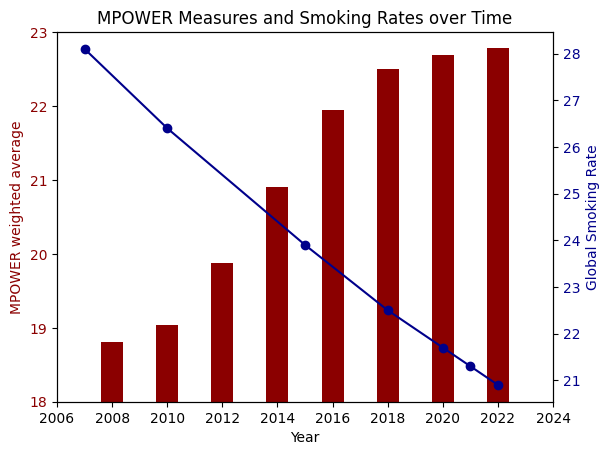

In [783]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
 
# Create a mask to smooth the smoking rate data into a line
ratemask = np.isfinite(cleaned_merged_rate_MPOWER["Smoking Rate"])

# Create the plot and set the axis values
fig, ax1 = plt.subplots()
plt.xlim(2006, 2024)
plt.ylim(18, 23)
 
# Plot the MPOWER values
ax1.set_xlabel('Year')
ax1.set_ylabel('MPOWER weighted average', color = 'darkred') 
ax1.bar(cleaned_merged_rate_MPOWER.index.tolist(), cleaned_merged_rate_MPOWER["Weighted Mean"], color = 'darkred') 
ax1.tick_params(axis ='y', labelcolor = 'darkred') 
 
# Adding Twin Axes to plot smoking rates
ax2 = ax1.twinx() 
ax2.set_ylabel('Global Smoking Rate', color = "darkblue") 
ax2.plot(cleaned_merged_rate_MPOWER["Smoking Rate"][ratemask], linestyle='-', marker='o', color = "darkblue") 
ax2.tick_params(axis ='y', labelcolor = "darkblue") 
 
# Adding title
plt.title('MPOWER Measures and Smoking Rates over Time') 
 
# Show plot
plt.show()

## Conclusion
The data shows that there is a clear correlation between the number of smoking prevention measures in place globally and the global smoking rate.
This clearly demonstrates that smoking prevention measures reduce smoking rates.  Therefore increasing smoking bans as a way to reduce smoking rates is a policy supported by global evidence.

## Question Two: 
Based on this analysis, how effective will the new ban be on reducing smoking prevalence and mortality?